# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### 1.1 Generating dataset

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [4]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
no_training_epochs = 5

### 1.3 Data examination

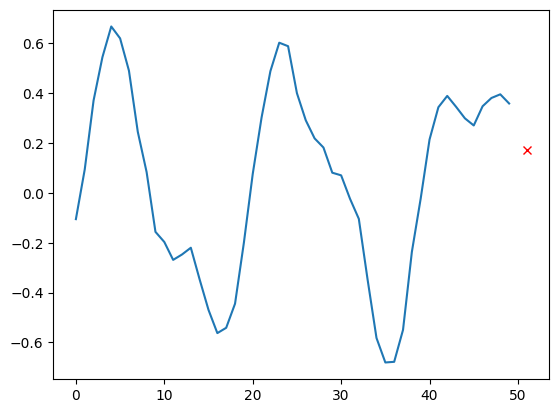

In [6]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [7]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [9]:
model_linear.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0056 - val_mean_squared_error: 0.0056


In [11]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

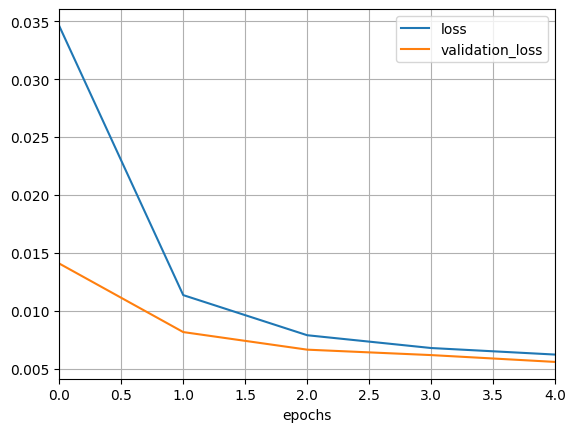

In [12]:
plot_function(history_linear)

In [13]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.005448721349239349
Test MSE:  0.005448721349239349


### 1.5 Simple RNN Model

In [14]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [16]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.7664 - mean_squared_error: 0.7664 - val_loss: 0.6273 - val_mean_squared_error: 0.6273
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5030 - mean_squared_error: 0.5030 - val_loss: 0.3884 - val_mean_squared_error: 0.3884
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3690 - mean_squared_error: 0.3690 - val_loss: 0.3388 - val_mean_squared_error: 0.3388
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2954 - mean_squared_error: 0.2954 - val_loss: 0.2970 - val_mean_squared_error: 0.2970
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2725 - mean_squared_error: 0.2725 - val_loss: 0.2652 - val_mean_squared_error: 0.2652


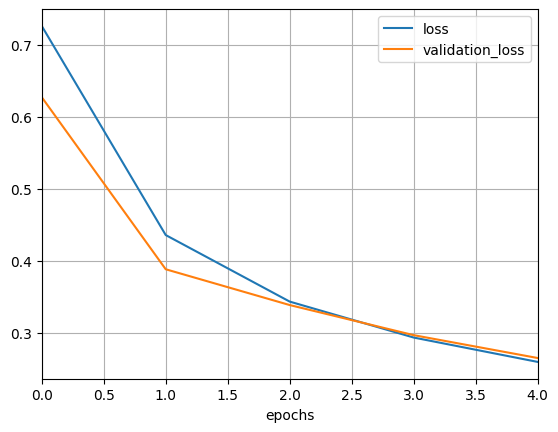

In [17]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [18]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [19]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [20]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


In [21]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.0031016748398542404
Test MSE:  0.0031016748398542404


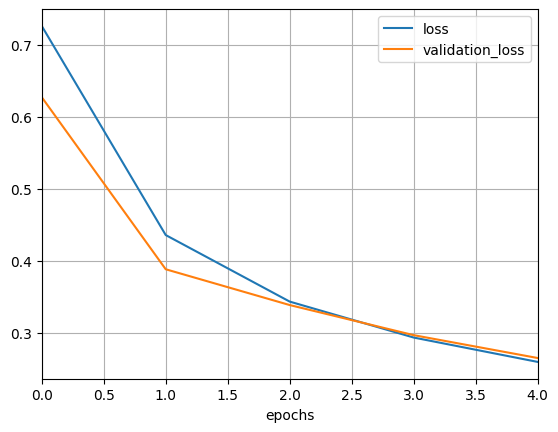

In [22]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [23]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU, Dropout
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from keras.preprocessing.sequence import pad_sequences
#from keras.preprocessing.text import Tokenizer

#includes for using vscode
#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences


### 2.1 - Load dataset

In [24]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 2.2 - Dataset examination

In [25]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [27]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [28]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [29]:


embed_size = 128
vocabulary_size = 1000

"""
model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size, input_shape=[None]),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
])
"""
model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size, input_shape=[None]),

    # LSTM with lighter L2 regularization and Dropout
    keras.layers.LSTM(128, return_sequences=True, kernel_regularizer=l2(0.0001)),
    Dropout(0.2),

    keras.layers.LSTM(128, kernel_regularizer=l2(0.0001)),
    Dropout(0.2),

    keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.0001))
])



model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()





/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, None, 128)      │       128,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, None, 128)      │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, None, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391,297 (1.49 MB)

 Trainable params: 391,297 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
optimizer = Adam(learning_rate = 0.001)

In [31]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [32]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.5324 - loss: 0.7009 - val_accuracy: 0.6810 - val_loss: 0.6161
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5650 - loss: 0.6879 - val_accuracy: 0.5534 - val_loss: 0.6922
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5261 - loss: 0.6995 - val_accuracy: 0.5376 - val_loss: 0.6946
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5156 - loss: 0.6968 - val_accuracy: 0.5070 - val_loss: 0.6956
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5225 - loss: 0.6952 - val_accuracy: 0.5064 - val_loss: 0.6973


In [33]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.6980571150779724
Test accuracy:  50.040000677108765 %


TASK: Modify structure, change the core of the network from RNN to LSTM and GRU. Compare the results

The default layer setup yielded an accuracy of around 50%. Changing the model to LSTM with the same layer setup returned a higher accuracy of around 80 to 82%. Utilizing dropout layers and L2 regularization results in similar outcomes.